**Классификация рака молочной железы с помощью наивного байесовского классификатора**

В данном примере используется наивный байесовский классификатор для классификации рака молочной железы. Проведена загрузка данных, разделение, обучение модели, предсказание и оценка качества модели с использованием метрик точности, полноты, F1-меры и accuracy.

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

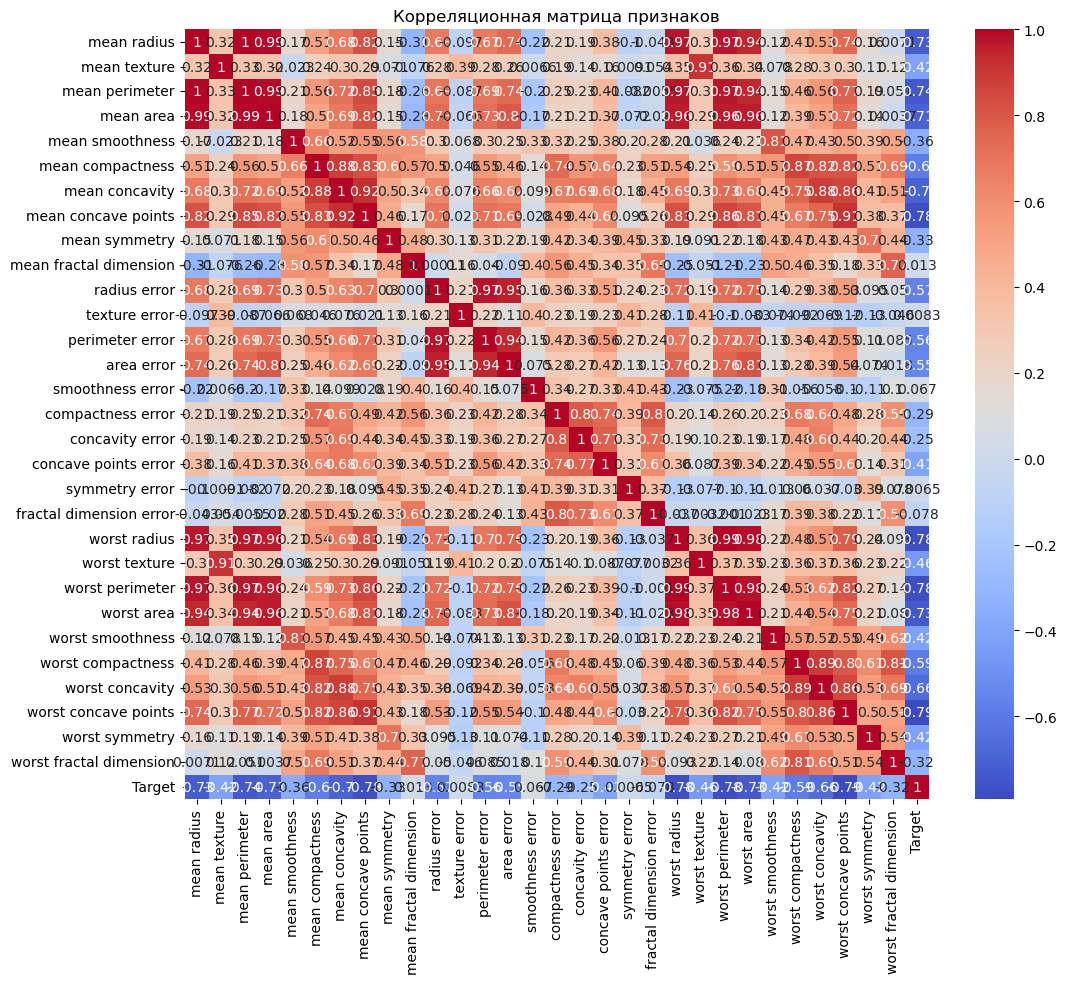

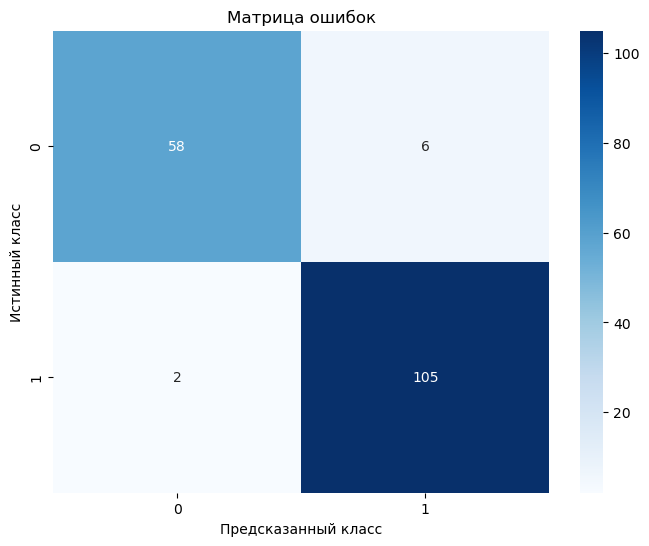

Accuracy: 0.9532163742690059
Precision: 0.9459459459459459
Recall: 0.9813084112149533
F1-score: 0.963302752293578
Confusion Matrix:
 [[ 58   6]
 [  2 105]]


In [6]:
# Используемые библиотеки
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузим набор данных Breast Cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data  
y = breast_cancer.target 

# Описание датасета
print(breast_cancer.DESCR)

# Демонстрация датасета
data = pd.DataFrame(data=X[:5], columns=breast_cancer.feature_names)
data['Target'] = y[:5]
print("Пример данных из датасета в виде таблицы:")
print(data)

# Разделение датасета на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

# Тепловая карта
data_full = pd.DataFrame(data=X, columns=breast_cancer.feature_names)
data_full['Target'] = y
plt.figure(figsize=(12, 10))
sns.heatmap(data_full.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

# Инициализация и обучение классификатора
clf = GaussianNB()  # гауссовский наивный байес
clf.fit(X_train, y_train)

# Предсказание классов для тестовых данных
y_pred = clf.predict(X_test)

# Расчет метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Расчет матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

# Вывод метрик и матрицы ошибок
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)
